In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../../utils/')
from utils_lib import *              
from utils_bdi import * 

plt.rcParams['mathtext.fontset'] = 'cm' 
np.set_printoptions(threshold=sys.maxsize)
font = {'size'   : 40,
        'family': 'arial'}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = (15,15)
matplotlib.rcParams['axes.titlepad'] = 20
matplotlib.rcParams['axes.titlesize'] = 40

In [2]:
# Constants and Variables
FEEDBACK_CONDITIONS = ['neg', 'neut', 'pos']
COLORS_BDI_GROUP = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
COLORS_FEEDBACK={'baseline': {'neut': '#808080', 'pos': '#15B01A', 'neg': '#FF0000'}, 
                    'fb': {'pos': '#15B01A', 'neg': '#FF0000', 'neut': '#808080'}}
DATA_PATH = './../data/processed/'
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

In [3]:
# Read data 
df_full = pd.read_csv(f'{DATA_PATH}fixed_feedback_data_processed_subtrials.csv')
df_trials = pd.read_csv(f'{DATA_PATH}fixed_feedback_data_processed_trials.csv')

df_baseline=df_trials[df_trials.condition=='baseline']
df_metacog = pd.read_csv('./../data/processed/fixed_fb_data_processed_metacognitive_analysis_baseline.csv')
df_metacog_non_baseline = pd.read_csv('./../data/processed/fixed_fb_data_processed_metacognitive_analysis_non-baseline.csv')
df_first=df_trials[df_trials.trial==1]
df_first=standardise(df_first, 'confidence')



/var/folders/xf/299x0l456pl3nxbc1jbwpyfc0000gn/T/ipykernel_7559/2499649154.py:2: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(f'{DATA_PATH}fixed_feedback_data_processed_subtrials.csv')
/Users/annelene/Documents/uni/papers/metacog/github/fixed_feedback/notebooks/utility_functions.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{var}_c']=(df[f'{var}']-df[f'{var}'].mean())/df[f'{var}'].std()


# Figure 1 e,f,g

In [5]:
def plot_violin_diff_perf(df):
    fig, ax = plt.subplots(figsize=(10, 10))
    make_figure(ax)
    sns.violinplot(data=df, x='correct', y='diff', color='lightgrey', linewidth=3, **PROPS)
    ax.scatter(range(3), df.groupby('correct').median()['diff'].values, c='blue', zorder=10, s=150, edgecolor='black')
    plt.xlabel('Difficulty', fontsize=60, labelpad=15)
    plt.ylabel('Estimation error', fontsize=60)
    plt.xticks(range(3), ['Easy', 'Medium', 'Hard'])
    plt.ylim([-90, 70])
    plt.savefig('../figures/1_g_experimental_design_violin.jpg', dpi=300, bbox_inches='tight')
    plt.show()


def plot_histogram(df, variable, xlabel):
    fig, ax = plt.subplots(figsize=(10, 10))
    make_figure(ax)
    sns.histplot(df.groupby('pid').mean(), x=variable, bins=20, alpha=0.5, color='grey', kde=True,
                 line_kws={'linewidth': 5, 'color': 'black', 'alpha': 0.8}, edgecolor=None)
    ax.lines[0].set_color('black')
    plt.xticks(np.arange(0, 101, 20), np.arange(0, 101, 20))
    plt.xlabel(xlabel, fontsize=60)
    plt.ylabel('Frequency', fontsize=60)
    plt.xlim([20, 80] if variable == 'confidence' else [-0.9,0.3] )
    plt.savefig(f'../figures/1_ef_experimental_design_hist_{variable}.jpg', dpi=300, bbox_inches='tight')
    plt.show()

    
    'Confidence'

# Figure 2 

In [6]:
def exclude_first_trials():
    # Exclude the first 5 trials in the first block
    df = df_trials[~((df_trials['block'] == 1) & (df_trials['trial'].isin(range(6))))]
    df.loc[df_trials['block'] == 1, 'trial'] = df_trials[df_trials['block'] == 1]['trial'].subtract(5)
    return df


def plot_mean_over_trials(var_dp, ax, xlabel):
    # Drop the first 5 trials in the first block
    df_equal_trials=exclude_first_trials()
    vals = df_equal_trials.groupby(['condition_block','trial'])[var_dp].agg(['mean', 'sem'])
    for arg in ['baseline', 'fb']:
        [ax.errorbar(range(1,12), vals['mean'][cond][:11], yerr=vals['sem'][cond][:11], 
                c=COLORS_FEEDBACK[arg][cond],linewidth=6, elinewidth=3, 
                 markersize=100, alpha=0.5) for cond in ['neut', 'pos', 'neg']]   
    ax.set_xlabel('Trial')
    lg=ax.legend(loc=(1,0.2), title='Feedback', fontsize=30)
    lg.get_title().set_fontsize(32)
    ax.set_ylabel(f'{xlabel}')
    ax.axvline(11, c='black', linestyle = '--', lw=3)
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.set_yticks([40,45,50,55], [40,45,50,55])

    
def plot_conf_over_trials():
    fig,ax=plt.subplots(figsize=(12,5))
    make_figure(ax)
    plot_mean_over_trials('confidence', ax,'Confidence')
    ax.text(3,52,r'Baseline', fontsize=32)
    ax.text(4.5,50,r'trials', fontsize=32)
    #plt.savefig('./../figures/conf_over_trials_wide.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_perf_over_trials():
    fig, ax = plt.subplots(figsize=(12, 5))
    make_figure(ax)
    plot_mean_over_trials('pavg', ax,'performance')
    ax.text(3, 52, 'Baseline', fontsize=32)
    ax.text(4.5, 50, 'trials', fontsize=32)
    #plt.savefig('./../figures/perf_over_trials_wide.jpg', dpi=300, bbox_inches='tight')
    plt.show()

    
def plot_feedback_modulates_confidence():
    fig, ax = plt.subplots(figsize=(10, 10))
    make_figure(ax)
    sns.barplot(data=df_trials, x="baseline", hue='condition_block',
                y='confidence', palette=COLORS_FEEDBACK['baseline'].values(), edgecolor='black', ax=ax,
                order=[1, 0])
    ax.set_xticklabels(['Baseline', 'Feedback'])
    plt.ylim([30, 55])
    plt.ylabel('Confidence')
    plt.xlabel('')
    ax.legend(loc=(1, 0.2), title='Feedback')
    [ax.axes.containers[i][0].set_alpha(0.4) for i in range(3)]
    plt.show()
    
    
def plot(dat, cond, alpha=1):
    sns.lmplot(data=dat, x="pavg", hue='condition_block', 
            y='confidence', palette=COLORS_FEEDBACK[cond].values(), aspect=0.8, height=10, 
            scatter_kws={'s': 100, 'alpha':0.2, 'edgecolor':'black'},
          line_kws={'linewidth': 6, 'alpha': alpha}, legend=False, 
          scatter=False)
    plt.ylim([25,70])
    plt.xlabel('Performance')
    plt.ylabel('Confidence')
    plt.title(f'{cond.capitalize()} trials')
    #plt.savefig('./../figures/2_d_feedback_modulates_confidence_baseline.jpg', dpi=300, bbox_inches='tight')


# Figure 3
BDI score correlates with metacognitive bias but not sensitivity

In [7]:
def plot_metacog_bias(dat, var_dp, label, col, alpha=1):
    fig, ax = plt.subplots(figsize=(10,10))
    make_figure(ax)
    sns.regplot(data=dat, x='bdi_avg', y=var_dp, color=col, 
               ci=95, scatter_kws={'s': 100, 'alpha': alpha, 'edgecolor':'black'}, 
                line_kws={'alpha':0.8, 'linewidth':6}, scatter=False, label=label)
    plt.ylim([-1.6, 0.5])
    plt.legend(fontsize=24)
    plt.xlabel('BDI score')
    plt.ylabel('Metacognitive bias')
    #plt.savefig('./../figures/metacog_bias_fb.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    
    
## Metacognitive sensitivity 
def plot_metacog_sense(dat, label, alpha=1):
    fig, ax = plt.subplots(figsize=(10,10))
    make_figure(ax)
    sns.regplot(data=dat, x='bdi_avg', y='pid.pavg_c', color='black', ci=95, scatter_kws={'s': 100, 'alpha':0.3, 'edgecolor':'black'},
               line_kws={'alpha': alpha, 'linewidth':6}, scatter=False, label=label)
    plt.ylim([-0.1,0.45])
    plt.xlabel('BDI score')
    plt.ylabel('Metacognitive sensitivity')
    plt.legend(fontsize=24)
    #plt.savefig('./../figures/metacog_sense.jpg', dpi=300, bbox_inches='tight')
    plt.show()

# MAIN

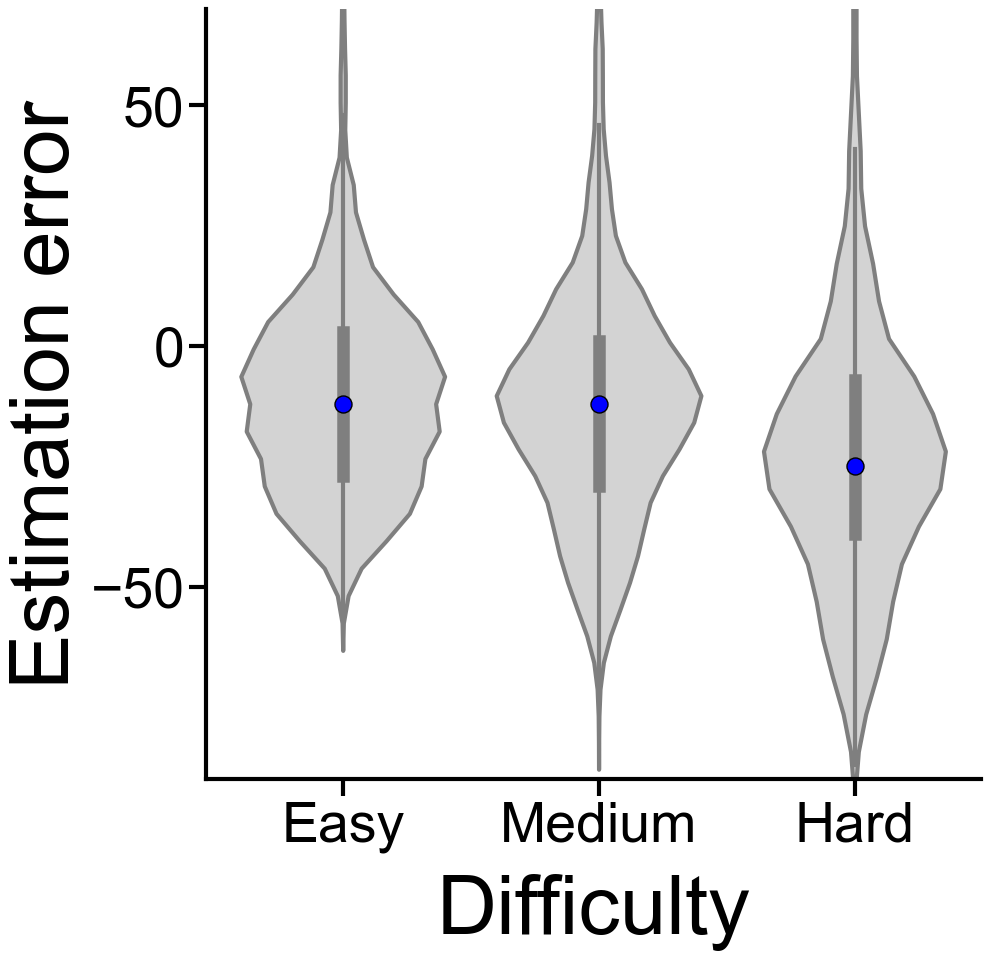

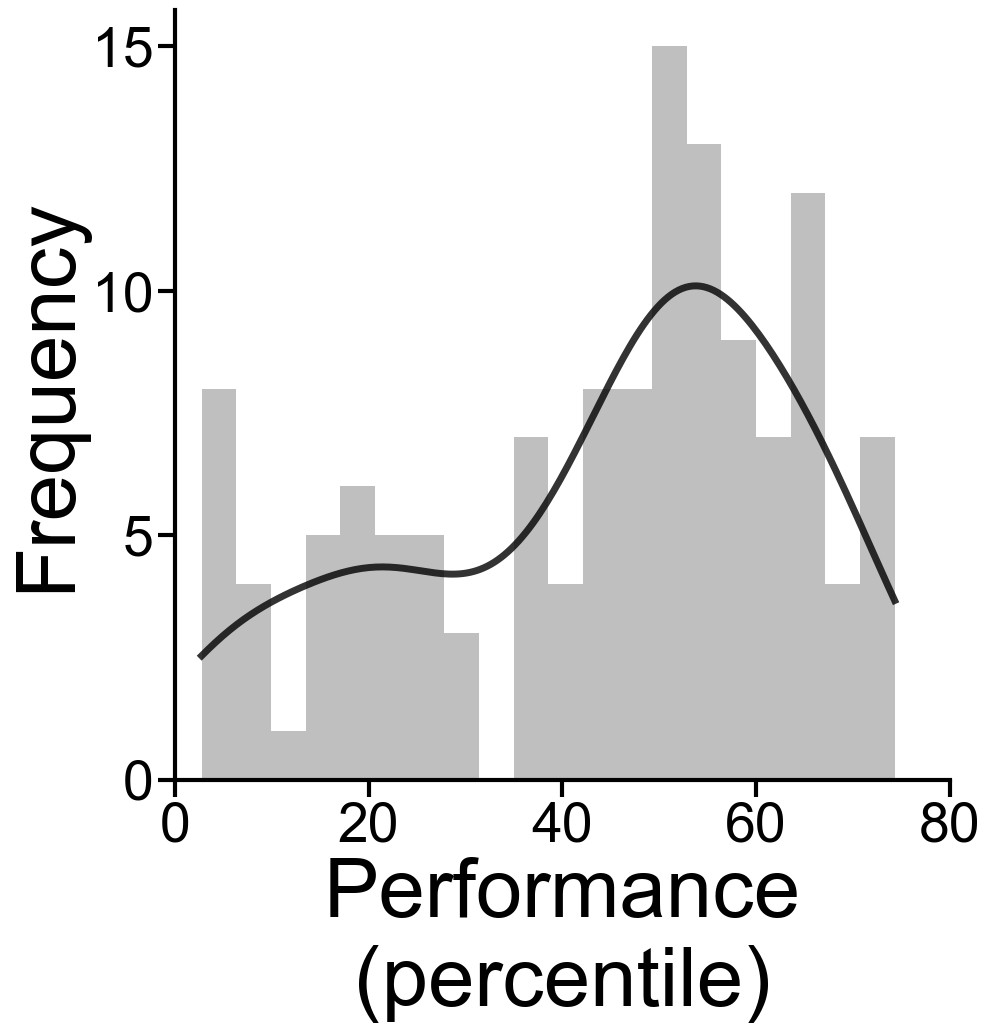

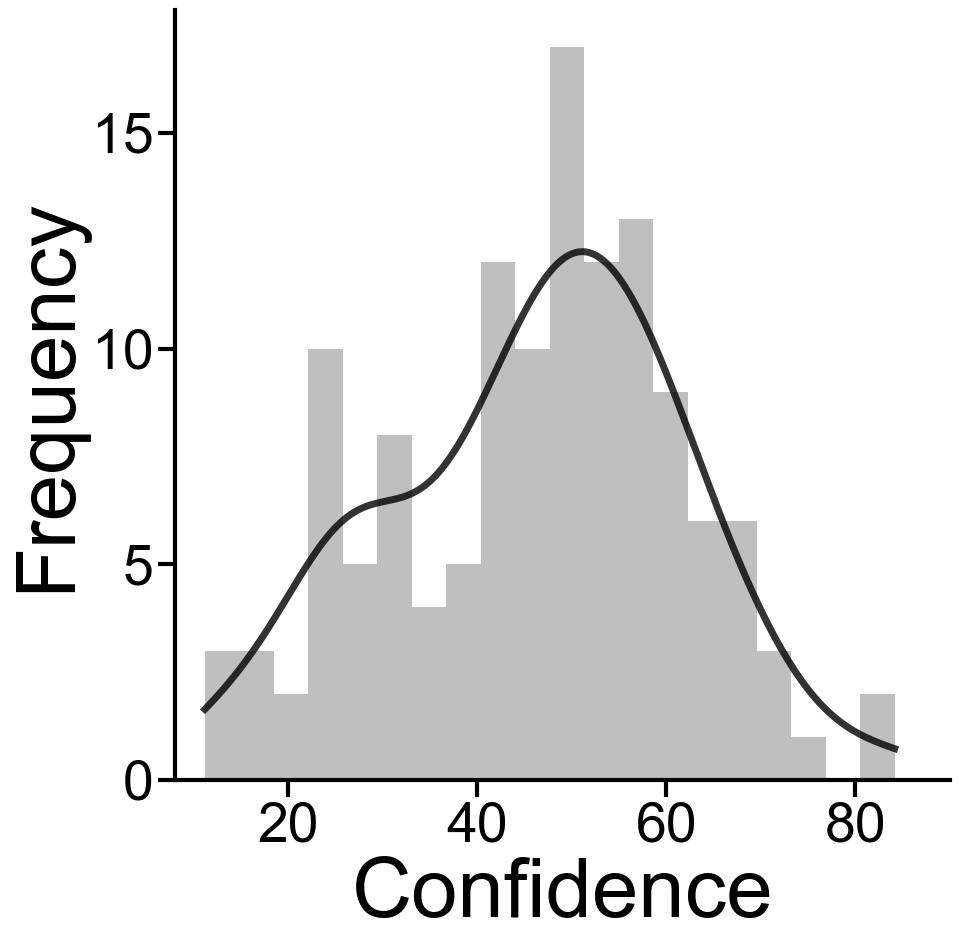

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


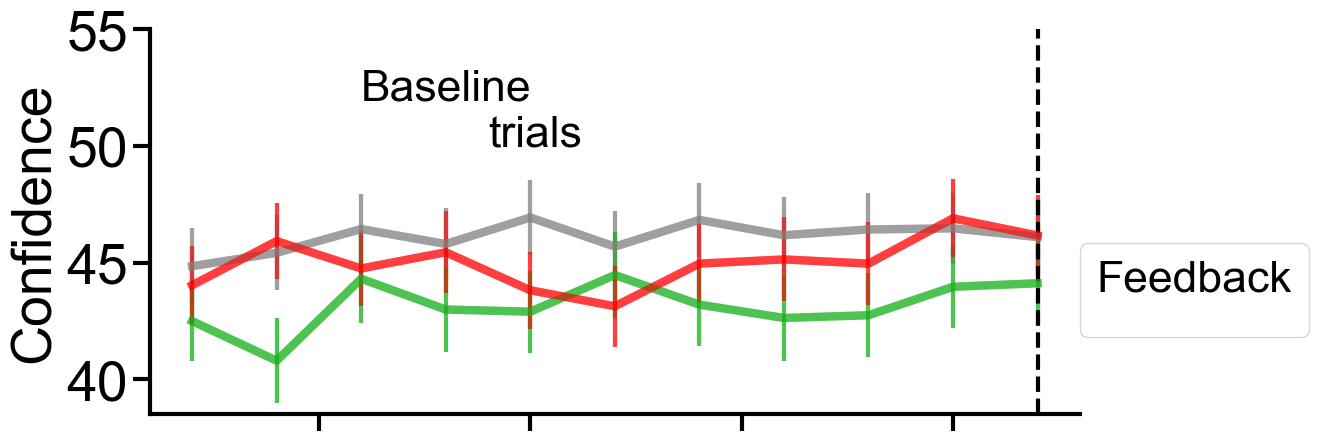

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


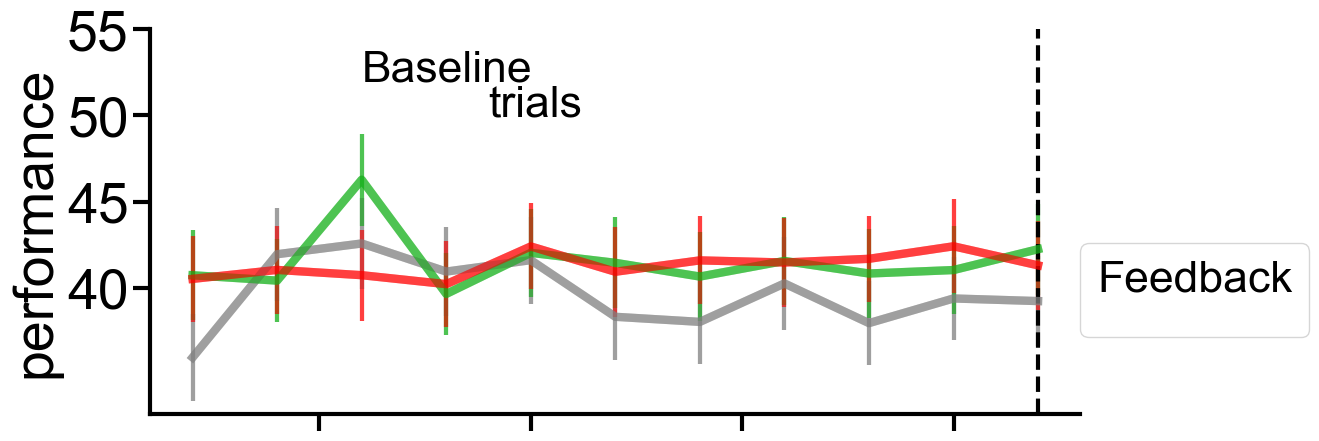

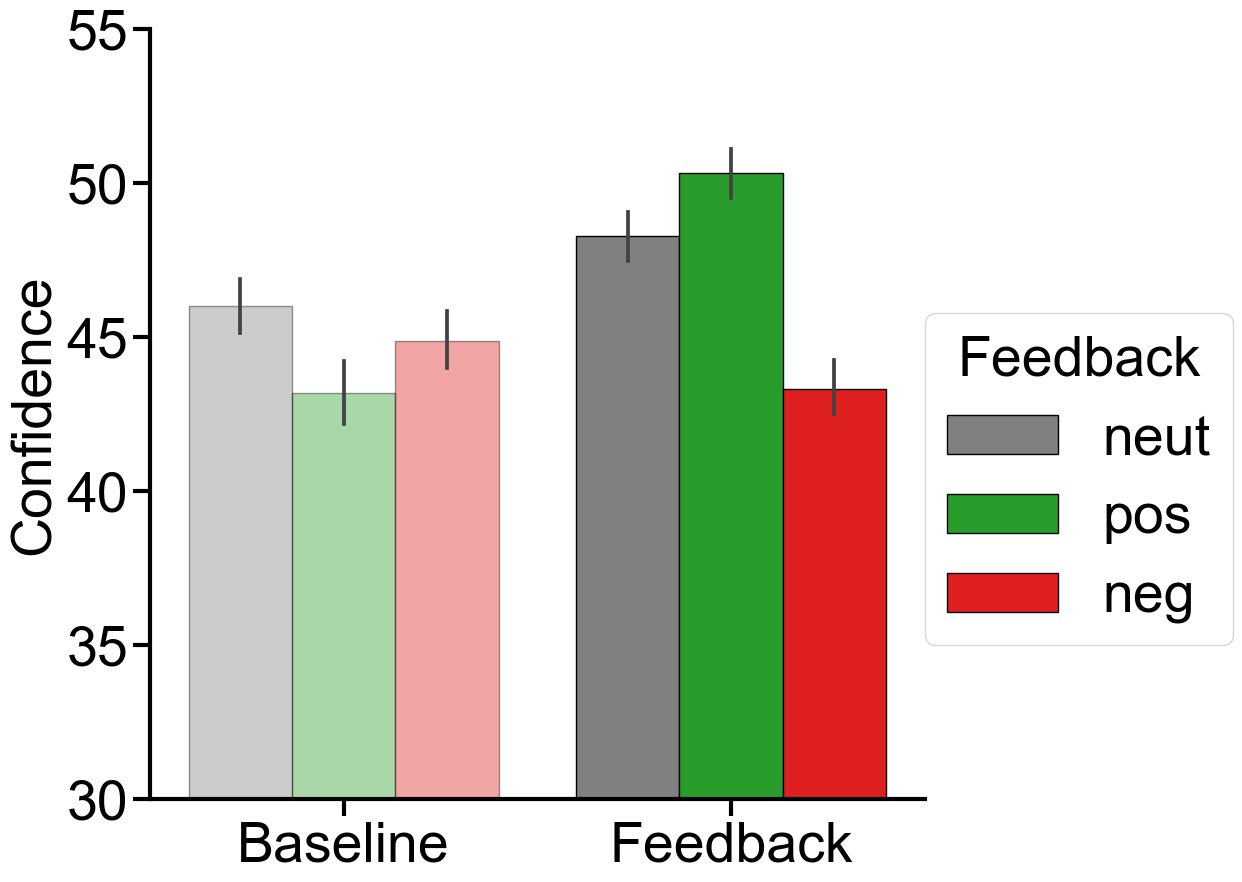

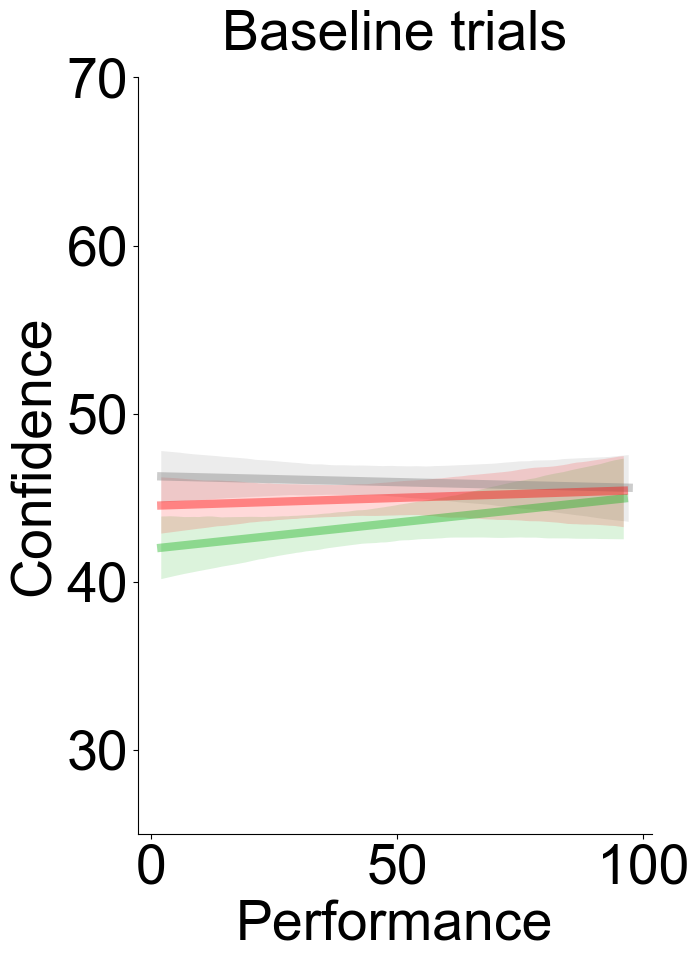

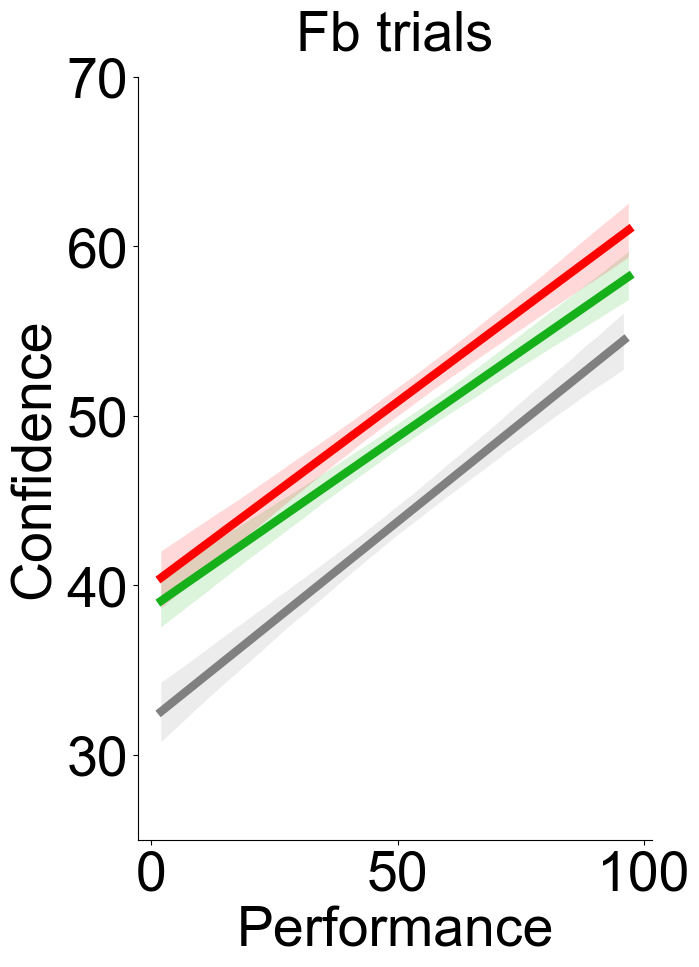

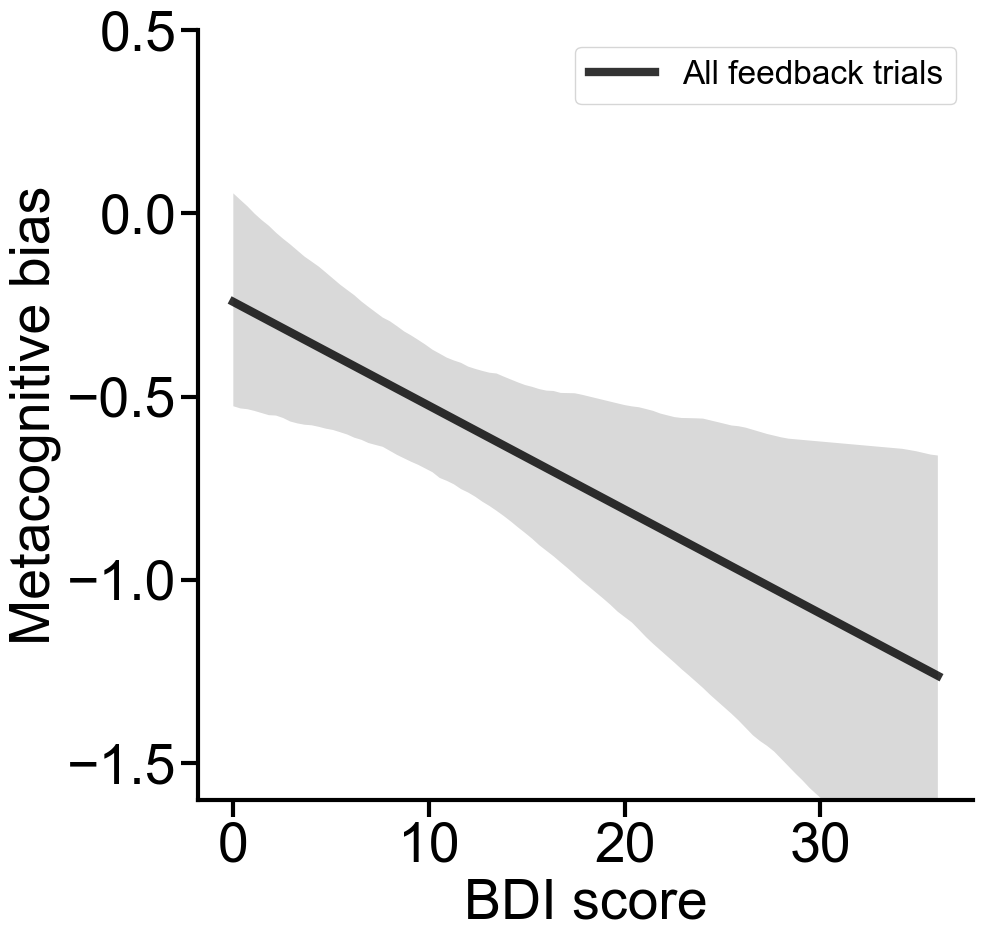

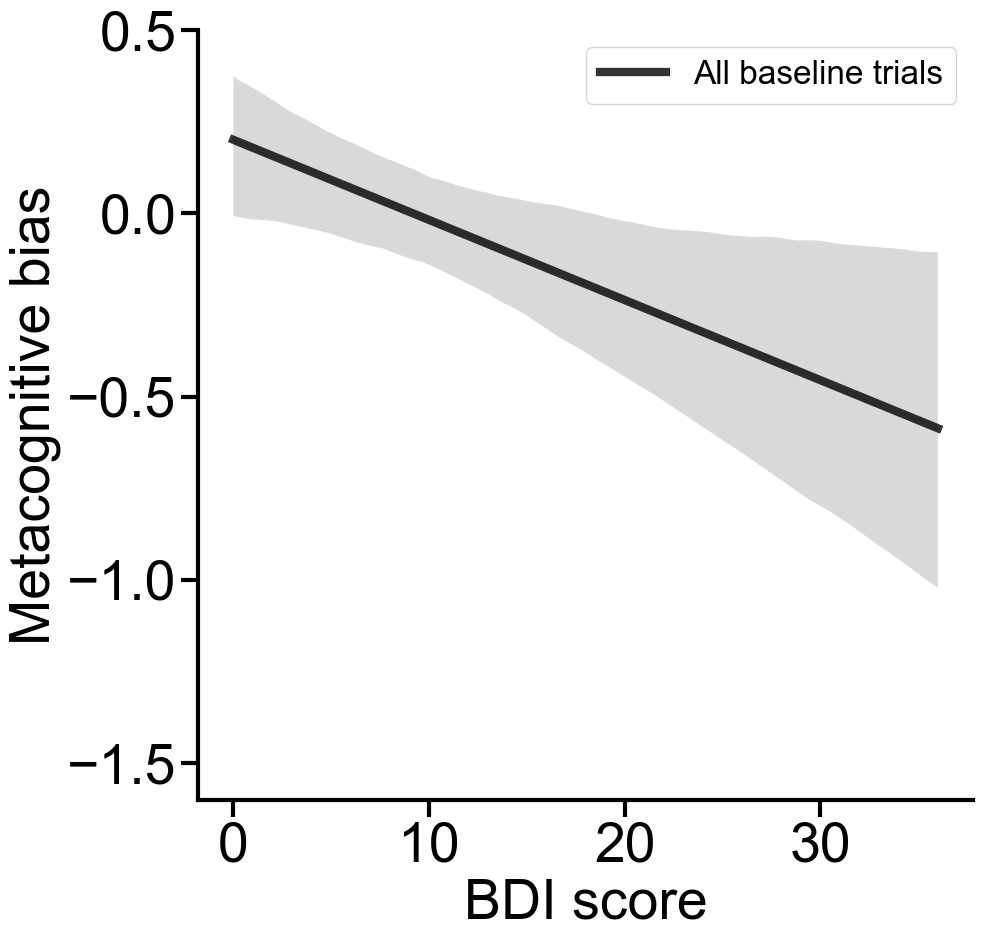

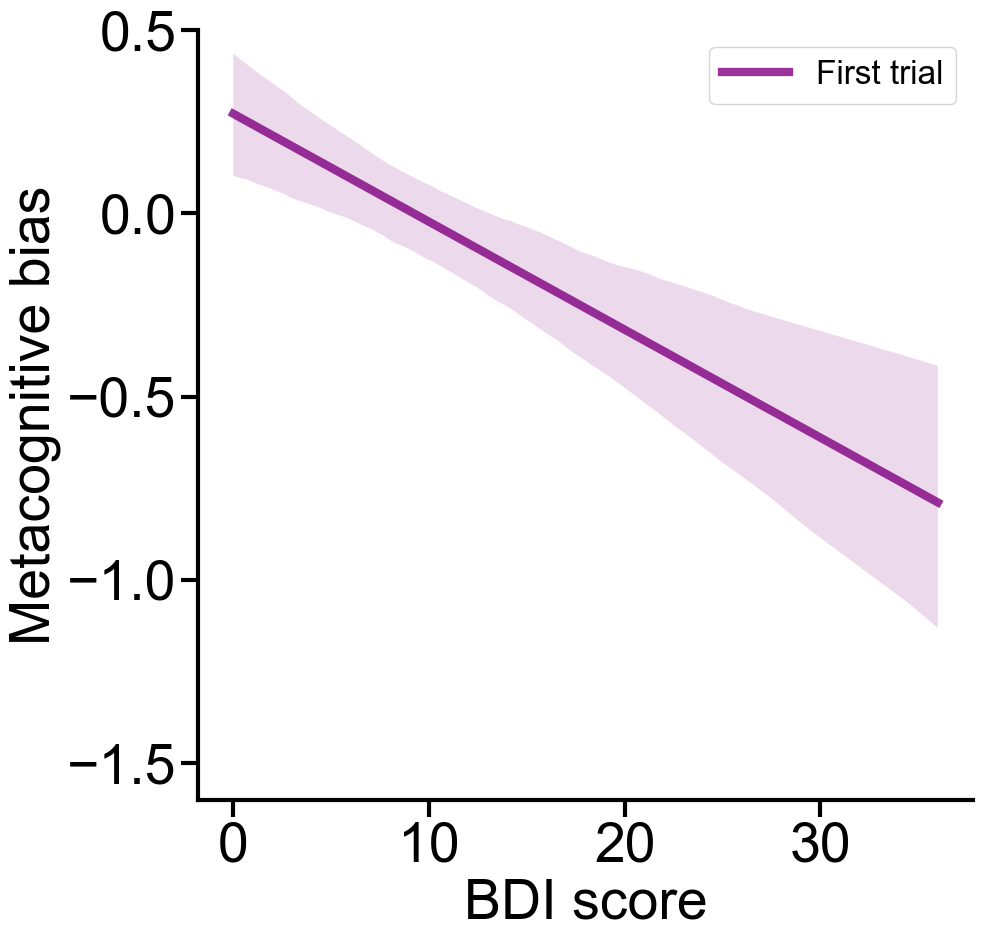

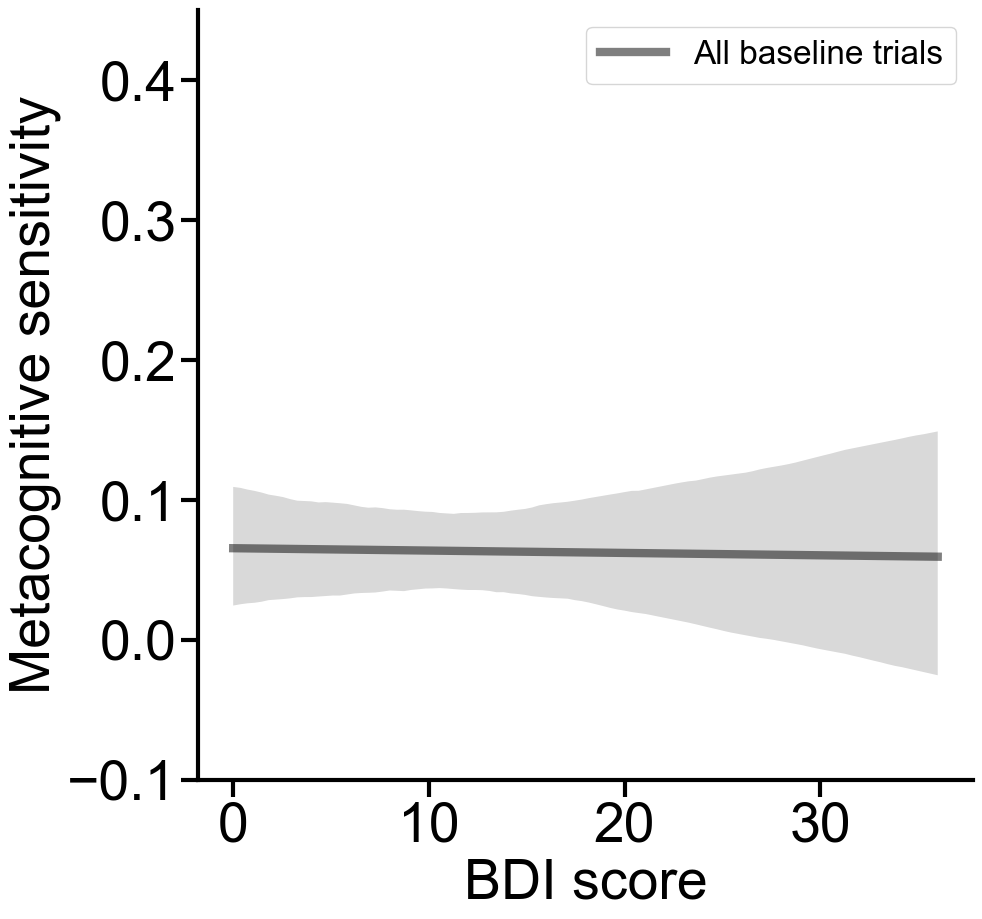

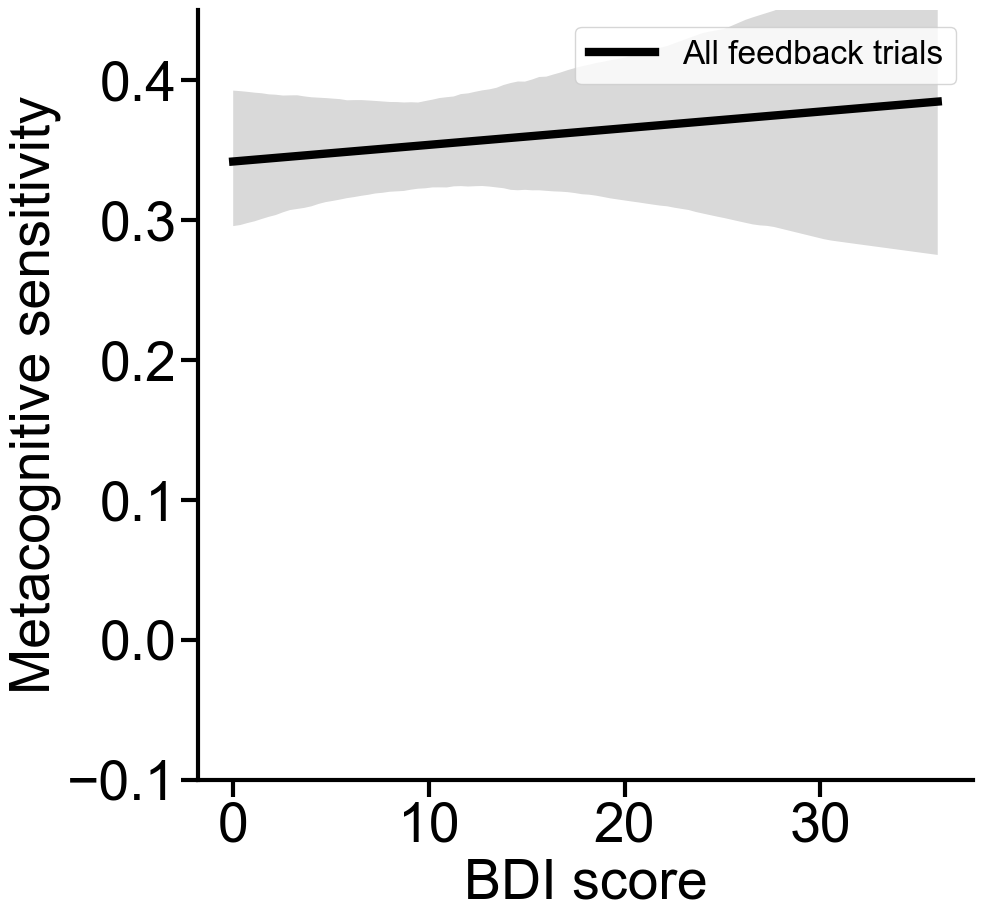

In [8]:
def main():
    # Read data from files
    df_full = pd.read_csv(f'{DATA_PATH}fixed_feedback_data_processed_subtrials.csv', low_memory=False)
    df_trials = pd.read_csv(f'{DATA_PATH}fixed_feedback_data_processed_trials.csv')

    # Figure 1 e,f,g
    plot_violin_diff_perf(df_full)
    plot_histogram(df_trials, 'pavg', 'Performance\n(percentile)')
    plot_histogram(df_trials, 'confidence', 'Confidence')
    
    # Figure 2 a,b,c,d
    plot_conf_over_trials()
    plot_perf_over_trials()
    plot_feedback_modulates_confidence()
    plot(df_trials[df_trials['condition']=='baseline'], 'baseline', 0.4)
    plot(df_trials[df_trials['condition']!='baseline'], 'fb')

    # Figure 3 a,b,c,d
    plot_metacog_bias(df_metacog_non_baseline, 'pid..Intercept.', 'All feedback trials', 'black', 0.6)
    plot_metacog_bias(df_metacog, 'pid..Intercept.', 'All baseline trials', 'black', 0.3)
    plot_metacog_bias(df_first, 'confidence_c', 'First trial', 'purple', 0.5)

    plot_metacog_sense(df_metacog, 'All baseline trials', 0.5)
    plot_metacog_sense(df_metacog_non_baseline, 'All feedback trials')


if __name__ == '__main__':
    main()

In [93]:
x=4

